# COMP47670 - Data Collection & Preparation Assignment
#### Name: Benjamin Jennings 
#### Email:  ben.jennings@ucdconnect.ie
#### Student Number: 16316341


In [48]:
#imports 

import urllib.request

import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

## Task 1: Selecting appropriate API

#### NASA Exoplanet Archive API - Key request: https://api.nasa.gov/?search=star
#### User guide: https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html

In [49]:
#API key does not appear to be necessary to call from the exoplanet archive.
#Needed for other NASA APIs.

nasa_key = 'hKoV26IUtCPp6NvvRLp7C5hpnd7a9uFge6E2UdxF' #limited to 1000 requests per hour.

## Task 2: Collecting and parsing data. 

### 1. Defining general functions to collect the raw data from API.

In [50]:
#The API provides a handy way of accessing data using a constructed url.
#Therefore, we can create a function that makes the url.

def exoplanet_url(table,columns='',ffrmt=''):
    
    '''
    Returns constructed url for NASA Exoplanet API query.
    
    -----Params-----
    table: str, desired data table (non-default argument).
    columns: str, columns required from table.
    ffrmt: str, desired file format (e.g. JSON).
    ----------------
    '''
    
    base_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?' #base url needed for API.

    _table = 'table=' + table
    _columns = 'select=' + ','.join(columns) #concatenating columns list into single string.
    _ffrmt = 'format=' + ffrmt 
    
    url = ('{}&{}&{}&{}').format(base_url,_table,_columns,_ffrmt)
    
    return url

In [51]:
#Next, we create a function that returns the response to our API query/url.
#This calls the previous function to create the url.

def exoplanet_reader(table,columns='',ffrmt=''):
    
    '''
    Returns decoded response (data) from url request.
    
    -----Params-----
    table: str, desired data table (non-default argument).
    columns: str, columns required from table.
    ffrmt: str, desired file format (e.g. JSON).
    ----------------
    '''
    
    data_url = exoplanet_url(table,columns,ffrmt)
        
    resp = urllib.request.urlopen(data_url).read().decode('utf-8') #needs to be decoded from HTTPResponse.
    
    return resp

### 2. Parsing the exoplanet data, storing it in JSON format.

In [52]:
#The API contains four tables of data, chosen here is the confirmed exoplanets table (key: 'exoplanets').

_table='exoplanets'

#Each exoplanet contains 82 parameters including information on the host star, telescope etc.
#For the purposes of this assignment;
#I will use the APIs functionality to return relevant parameters on the exoplanets only.

_columns = ['pl_name', #name of planet.
            'pl_discmethod', #method used to discover the planet.
            'ra_str','dec_str', #location of planet in sky.
            'pl_orbsmax', #planets semi-major axis (AU).
            'pl_orbper', #orbital period of planet.
            'pl_bmassj', #planet mass in terms of Jupiter masses.
            'pl_radj', #radius in terms of Jupiter radii.
            'pl_dens', #density of planet.
            'rowupdate', #date when the archive was updtaed
            'pl_disc', #discovery year.
            'pl_facility', #discovery facility.
            'pl_instrument', #instrument used to discover.
            'pl_edelink'] #link to Exoplanet Encyclopedia page.

#Collecting the raw data by calling the above functions and putting into JSON (str) format.

_ffrmt = 'json'

exoplanet_data = json.loads(exoplanet_reader(_table,columns=_columns,ffrmt=_ffrmt))

In [53]:
#Writing the data to a JSON file.

file_name = 'exoplanet_data.json'

with open(file_name,'w') as f: 
    
    json.dump(exoplanet_data,f,indent=2) #indent makes JSON file easier to read.

#### *Note: len(exoplanet_data) = 4301 confirmed exoplanets as of 10/11/2020.

In [54]:
#Example planet - WASP-121b.

pl_key = 'WASP-121 b'

WASP121b = [exoplanet_data[i] for i in range(len(exoplanet_data)) if exoplanet_data[i]['pl_name'] == pl_key][0]
WASP121b

{'pl_name': 'WASP-121 b',
 'pl_discmethod': 'Transit',
 'ra_str': '07h10m24.07s',
 'dec_str': '-39d05m50.6s',
 'pl_orbsmax': 0.02544,
 'pl_orbper': 1.2749255,
 'pl_bmassj': 1.183,
 'pl_radj': 1.865,
 'pl_dens': 0.243,
 'rowupdate': '2016-06-23',
 'pl_disc': 2016,
 'pl_facility': 'SuperWASP',
 'pl_instrument': 'e2v CCD Camera',
 'pl_edelink': None}

## Task 3: Data preparation and analysis.

In [55]:
#We can use pandas dataframe to display the exoplanet data.
#Use the planets name as the index column.

expl_table = pd.read_json('exoplanet_data.json')

expl_table.set_index('pl_name')

,pl_discmethod,ra_str,dec_str,pl_orbsmax,pl_orbper,pl_bmassj,pl_radj,pl_dens,rowupdate,pl_disc,pl_facility,pl_instrument,pl_edelink
pl_name,,,,,,,,,,,,,
Kepler-138 c,Transit,19h21m31.57s,+43d17m34.7s,NaN,13.781300,0.00620,0.107,6.2,2015-06-17,2014,Kepler,Kepler CCD Array,None
Kepler-138 d,Transit,19h21m31.57s,+43d17m34.7s,NaN,23.088100,0.00201,0.108,2.1,2015-06-17,2014,Kepler,Kepler CCD Array,None
Kepler-139 b,Transit,18h49m34.07s,+43d53m21.7s,0.127,15.771044,NaN,0.262,NaN,2014-05-14,2014,Kepler,Kepler CCD Array,http://exoplanets.org/detail/Kepler-139_b
Kepler-139 c,Transit,18h49m34.07s,+43d53m21.7s,0.586,157.072878,NaN,0.302,NaN,2014-05-14,2014,Kepler,Kepler CCD Array,http://exoplanets.org/detail/Kepler-139_c
Kepler-140 b,Transit,19h09m28.67s,+46d46m05.6s,0.045,3.254270,NaN,0.144,NaN,2014-05-14,2014,Kepler,Kepler CCD Array,http://exoplanets.org/detail/Kepler-140_b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kepler-1514 c,Transit,19h30m30.59s,+37d51m36.5s,NaN,10.514100,NaN,0.118,NaN,2020-09-03,2020,Kepler,Kepler CCD Array,None
Kepler-1698 b,Transit,19h33m22.80s,+39d15m28.1s,NaN,1.210700,NaN,0.096,NaN,2020-09-03,2020,Kepler,Kepler CCD Array,None
Kepler-1699 b,Transit,19h28m32.96s,+48d55m01.9s,NaN,3.490820,NaN,0.140,NaN,2020-09-03,2020,Kepler,Kepler CCD Array,None


In [56]:
#Checking the number of blank values in each column.

expl_table.isnull().sum()

pl_name             0
pl_discmethod       0
ra_str              0
dec_str             0
pl_orbsmax       1749
pl_orbper         143
pl_bmassj        2515
pl_radj          1006
pl_dens          3747
rowupdate           0
pl_disc             0
pl_facility         0
pl_instrument       0
pl_edelink       2797
dtype: int64

### Data Analysis 1. Confirmed Exoplanet discoveries over time.

In [57]:
#Need to reduce dataframe to discovery date column.

#First find the min and max years to get an idea.

print(expl_table['pl_disc'].min())
print(expl_table['pl_disc'].max())

#Next we need to count the number of discoveries in each year.

counts = expl_table['pl_disc'].value_counts() #returns a series.
counts_sorted = counts.sort_index(ascending=True) #sort series by year index.
counts_sorted

1989
2020


1989       1
1992       2
1994       1
1995       1
1996       6
1997       1
1998       6
1999      13
2000      16
2001      12
2002      29
2003      22
2004      27
2005      36
2006      31
2007      52
2008      66
2009      95
2010      97
2011     138
2012     139
2013     125
2014     870
2015     157
2016    1505
2017     153
2018     315
2019     200
2020     185
Name: pl_disc, dtype: int64

<AxesSubplot:title={'center':'Exoplanet Detections Per Year'}, xlabel='Year', ylabel='Number of Exoplanets'>

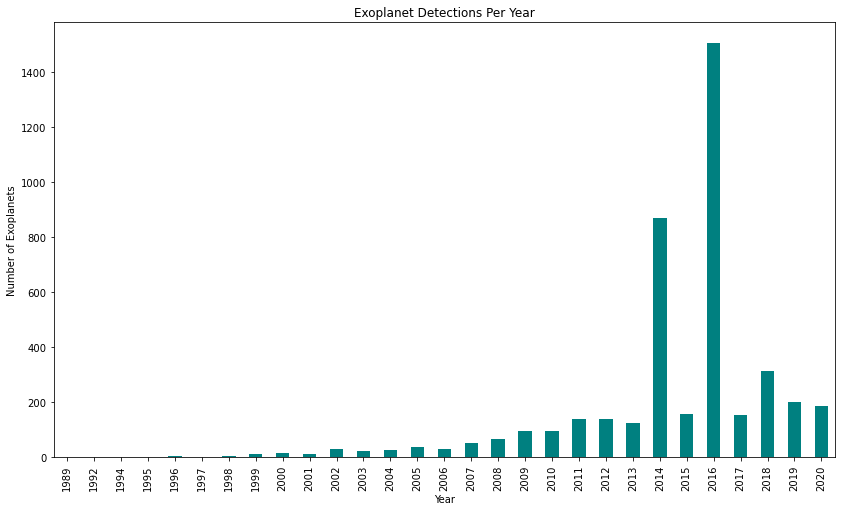

In [58]:
counts_sorted.plot.bar(color='teal',figsize=(14,8),title='Exoplanet Detections Per Year',
                       xlabel='Year',ylabel='Number of Exoplanets')

#### Clearly most exoplanets were discovered in recent years, especially 2016.

In [59]:
#We can take this a step further by determining the number of each physical detection methods for each year.
#This requires a new data frame (the unstack function pivots index cols).

method_table = expl_table.groupby(['pl_disc','pl_discmethod']).size().unstack('pl_discmethod')

method_table

pl_discmethod,Astrometry,Disk Kinematics,Eclipse Timing Variations,Imaging,Microlensing,Orbital Brightness Modulation,Pulsar Timing,Pulsation Timing Variations,Radial Velocity,Transit,Transit Timing Variations
pl_disc,,,,,,,,,,,
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN


In [60]:
#Number of exoplanets per discovery method (i.e. reducing table to series).

discovery_methods = expl_table.groupby('pl_discmethod')

discovery_methods.size()

pl_discmethod
Astrometry                          1
Disk Kinematics                     1
Eclipse Timing Variations          16
Imaging                            51
Microlensing                      105
Orbital Brightness Modulation       6
Pulsar Timing                       7
Pulsation Timing Variations         2
Radial Velocity                   821
Transit                          3270
Transit Timing Variations          21
dtype: int64

<AxesSubplot:title={'center':'Exoplanet Detections Per Year'}, xlabel='Year', ylabel='Number of Exoplanets'>

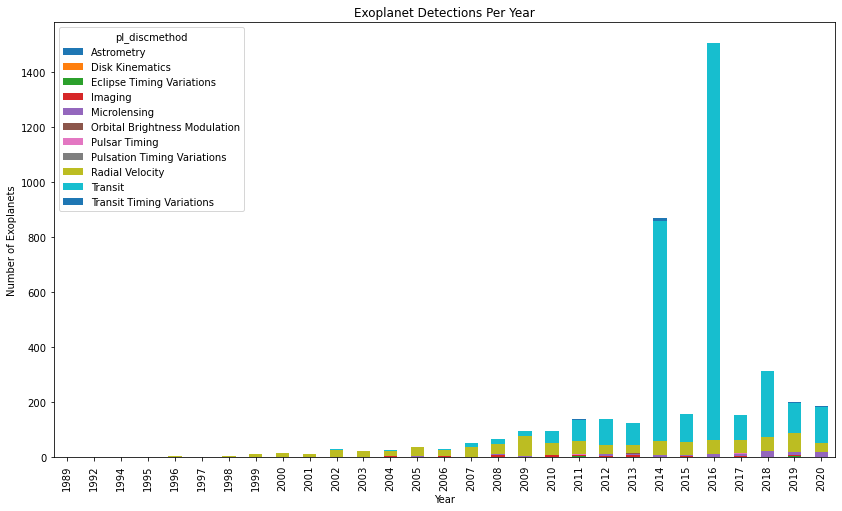

In [61]:
method_table.plot.bar(stacked=True,figsize=(14,8),title='Exoplanet Detections Per Year',
                       xlabel='Year',ylabel='Number of Exoplanets')

#### It is evident that the transit method is the method mainly used to discover most exoplanets per year since 2010.

### Data analysis 2. Mass vs. Orbital Distance.

In [62]:
#First we need to obtain and clean the relevant columns in a reduced data frame.

sub_table = expl_table[['pl_bmassj','pl_orbsmax','pl_radj']]

sub_table['pl_radj']

sub_table

,pl_bmassj,pl_orbsmax,pl_radj
0,0.00620,NaN,0.107
1,0.00201,NaN,0.108
2,NaN,0.127,0.262
3,NaN,0.586,0.302
4,NaN,0.045,0.144
...,...,...,...
4296,NaN,NaN,0.118
4297,NaN,NaN,0.096
4298,NaN,NaN,0.140
4299,NaN,NaN,0.259


In [63]:
#Statistical properties on the parameters distributions.

sub_table.describe()

,pl_bmassj,pl_orbsmax,pl_radj
count,1786.000000,2552.000000,3295.000000
mean,2.420005,8.896372,0.379361
std,4.391499,118.563827,0.426671
min,0.000060,0.004400,0.030000
25%,0.068748,0.056000,0.141000
50%,0.790000,0.117000,0.210000
75%,2.430000,0.659500,0.323500
max,55.590000,3500.000000,6.900000


In [64]:
#Missing values of subset.

sub_table.isnull().sum()

pl_bmassj     2515
pl_orbsmax    1749
pl_radj       1006
dtype: int64

#### *As we can see, a large amount of the data is missing.
#### There is considerable data missing due to the difficulty in detecting exoplanets, let alone constraining their parameters.

In [65]:
sub_table.dtypes.value_counts()

float64    3
dtype: int64

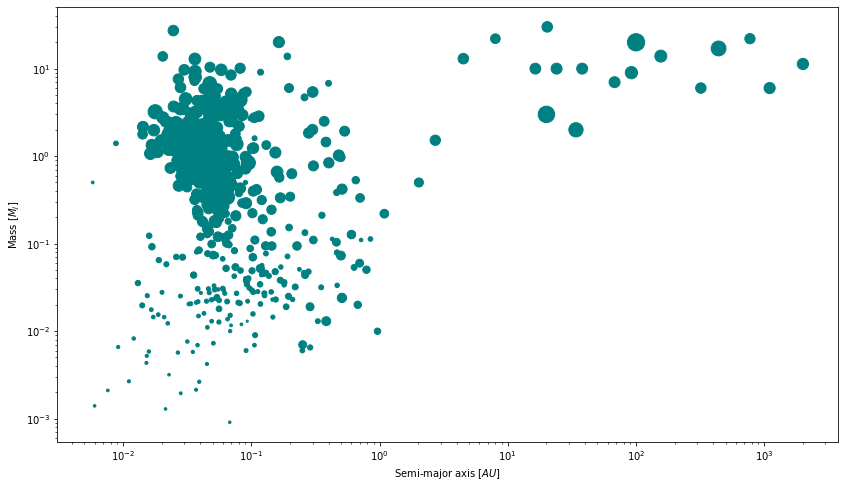

In [71]:
#Using matplotlib scatter to plot the values.

fig1 = plt.figure(figsize=(14,8))

plt.ylabel(r'Mass $[M_j]$')
plt.xlabel(r'Semi-major axis $[AU]$')

plt.scatter(sub_table['pl_orbsmax'],sub_table['pl_bmassj'],s=sub_table['pl_radj']*100,c='aquamarine')

plt.yscale('log') #must log axes due to large data spread.
plt.xscale('log')

#### As we can see, most exoplanets fall within relatively high masses and smaller orbital distances.

In [87]:
#We can investigate which exoplanets have an Earth-like mass.
#We first need to establish a range of masses.

#Mass (Mj - Jupiter masses).

mu = sub_table['pl_bmassj'] < 0.0157279 #5 Earth masses.
ml = sub_table['pl_bmassj'] > 0.000629115 #0.2 Earth masses.

In [88]:
#Numpys logical_and function can be used to find overlapping booleans.

m_range = np.logical_and(ml,mu)

In [89]:
#Now we can pass our booleans through the mass series.

mearth_like = sub_table['pl_bmassj'][m_range]

#We also need to pass it through the orbital distance and radii values for the plot.

dearth_like = sub_table['pl_orbsmax'][m_range]

rearth_like = sub_table['pl_radj'][m_range]

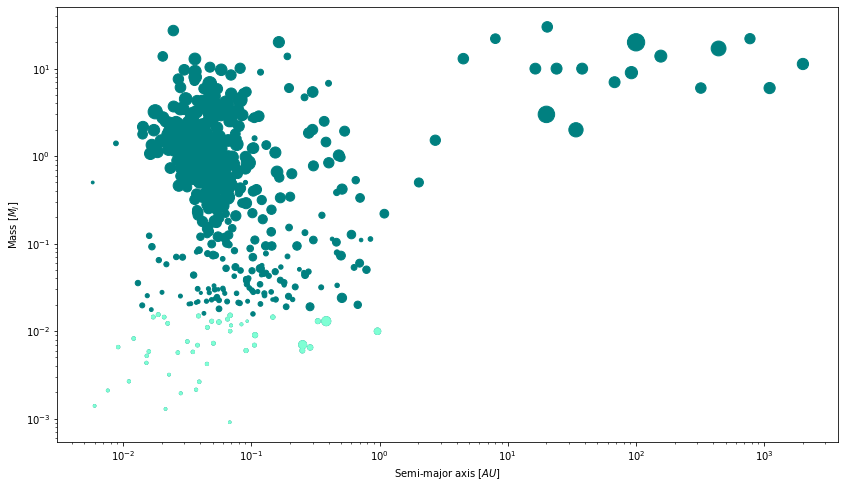

In [90]:
#We can repeat the plotting process now with these masses.

fig2 = plt.figure(figsize=(14,8))

plt.ylabel(r'Mass $[M_j]$')
plt.xlabel(r'Semi-major axis $[AU]$')

plt.scatter(sub_table['pl_orbsmax'],sub_table['pl_bmassj'],s=sub_table['pl_radj']*100,c='aquamarine')
plt.scatter(dearth_like,mearth_like,s=rearth_like*100,c='teal') #*100 is an arbitrary scalar used to show relative exoplanet sizes.

plt.yscale('log') #must log axes due to large data spread.
plt.xscale('log')

#### Earth-like mass planets appear to have smaller radii and are located within the Earth-Sun distance of 1AU.

## Conclusions

#### The elementary data analysis of NASA exoplanet data has led to some interesting insights.

#### 1. First, most exoplanets have been discovered in recent year with 1505 bring discovered in 2016. This can be attributed to advancements in ground based and space based technology.

#### 2. Most exoplanets have been discovered and confirmed over the years using the primary transit method. This is due to the overall difficulty in detecting objects in extrasolar systems very far away. 

#### 3. The mass vs. orbital distance shows a concentration of relatively large, massive and short orbit plantes. This concentration is closely linked to the transit method as it is far easier to detect larger planets that orbit closely to their host star.

#### 4. The final graph shows that exoplanets with Earth like masses tend to be found relatively closer to their stars and have smaller radii. However, this is a very loose constraint and more detailed physical analysis is necessary. It represents an elementary step in determine if a planet can permit the exitence of life as we know it. This depend on a huge number of factors including atmospheric composition and host star size etc. 